<a href="https://colab.research.google.com/github/jobellet/Dynamics-of-Visual-Representations-in-a-Macaque-Ventrolateral-Prefrontal-Cortex/blob/main/RSA_with_DNNs_processing_original_or_blurry_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# RSA with DNNs processing original or blurry images
---
####This script generates the figure comparing vlPFC representational geometry in the early and late time periods with DNN representations of the original images or the images that are blurred to simulate the information available from the magnocellular pathway
---

###Please ensure you have downloaded the required data from Figshare before proceeding.

**Google Colab:**



*   Upload the data to your Google Drive.
*   Select Google Drive in the widget below and mount your drive for the fastest access.




**Kaggle:**

*   Add the dataset to your notebook's Input directory (e.g., ../input/dataset-name).

*   Select Kaggle Input in the widget below.

**Local Computer:**

*   Store the downloaded files in a folder on your machine.

*   Select Local Storage in the widget below and paste the absolute path to that folder (e.g., /Users/name/data/).

In [ ]:
# ──────────────────────────────────────────────────────────────────────
# DATA SETUP WIDGET (Universal: Colab, Kaggle & Local)
# ──────────────────────────────────────────────────────────────────────
import ipywidgets as widgets
from IPython.display import display, clear_output
import os
import shutil
from pathlib import Path

# --- 1. CONFIGURATION
REQUIRED_FILES = [
    'deepNetFeatures.zip',
    'Spike_count_even_sessions.npy',
    'Spike_count_odd_sessions.npy',
    'hvm_public_extended_meta.csv',
    'high_variation_stimuli.zip'
]
DEST_DIR = Path("downloads")
DEST_DIR.mkdir(exist_ok=True)

# Detect Environment
IN_COLAB = 'google.colab' in str(get_ipython())
IN_KAGGLE = 'KAGGLE_KERNEL_RUN_TYPE' in os.environ

# --- UI Elements ---
style = {'description_width': '120px'}
layout_full = widgets.Layout(width='98%')

header = widgets.HTML("<h2>📂 Data Import Manager</h2>")

# Determine options based on environment
options = ['Local Upload']
if IN_COLAB:
    options = ['Google Drive', 'Local Upload']
elif IN_KAGGLE:
    options = ['Kaggle Input', 'Local Upload']
else:
    options = ['Local Storage', 'Local Upload']

source_toggle = widgets.ToggleButtons(
    options=options,
    description='Select Source:',
    button_style='info',
    style=style
)

# Input for Paths
path_input = widgets.Text(
    value='/content/drive/MyDrive/vlPFC_Geometry' if IN_COLAB else '.',
    placeholder='Enter absolute path to data folder...',
    description='Data Path:',
    disabled=False,
    layout=layout_full,
    style=style
)

btn_action = widgets.Button(
    description='Start Import',
    button_style='primary',
    icon='download',
    layout=widgets.Layout(width='200px')
)

out_log = widgets.Output(layout={'border': '1px solid #ddd', 'padding': '10px'})

# --- Logic ---
def update_ui(change):
    # Hide path input if 'Local Upload' (manual) is selected
    if source_toggle.value == 'Local Upload':
        path_input.layout.display = 'none'
    else:
        path_input.layout.display = 'flex'
        # Auto-update description based on selection
        if source_toggle.value == 'Google Drive':
            path_input.description = 'Drive Path:'
        elif source_toggle.value == 'Local Storage':
            path_input.description = 'Local Path:'
        elif source_toggle.value == 'Kaggle Input':
            path_input.description = 'Input Path:'
            # Common default path for Kaggle datasets
            path_input.value = '/kaggle/input/vlpfc-geometry'

source_toggle.observe(update_ui, 'value')

def on_click_action(b):
    with out_log:
        clear_output()
        mode = source_toggle.value

        # 1. Handle "Local Upload" (Colab only)
        if mode == 'Local Upload':
            if IN_COLAB:
                from google.colab import files
                print("🚀 Upload files now (select all required files):")
                uploaded = files.upload()
                for name in uploaded:
                    shutil.move(name, DEST_DIR / name)
                print("\n✅ Upload complete.")
            else:
                print("⚠️ Manual upload widget is Colab-only.")
                print(f"👉 Please manually copy files to: {DEST_DIR.absolute()}")
            return

        # 2. Handle Path-based imports (Drive, Local, Kaggle)
        src_path = Path(path_input.value)

        if mode == 'Google Drive' and not src_path.exists():
            from google.colab import drive
            print("🔄 Mounting Google Drive...")
            drive.mount('/content/drive')

        if not src_path.exists():
            print(f"❌ Error: Path not found: {src_path}")
            return

        print(f"🔎 Scanning {src_path} for files...")

        for fname in REQUIRED_FILES:
            dest = DEST_DIR / fname
            if dest.exists():
                print(f"   • {fname}: Already exists (Skipping)")
                continue

            # A. Try to find the exact file first
            found = list(src_path.rglob(fname))

            if found:
                print(f"   • Copying {fname}...", end=" ")
                shutil.copy(found[0], dest)
                print("Done.")

            # B. If not found, and it is a zip, look for the unzipped folder (Kaggle scenario)
            elif fname.endswith('.zip'):
                folder_name = Path(fname).stem # 'deepNetFeatures' from 'deepNetFeatures.zip'

                # Look for a directory with that name
                found_dirs = list(src_path.rglob(folder_name))
                # Ensure it is actually a directory
                found_dirs = [d for d in found_dirs if d.is_dir()]

                if found_dirs:
                    print(f"   • Found extracted folder '{folder_name}'. Re-zipping to {fname}...", end=" ")
                    # shutil.make_archive expects the base name (no extension) and the root dir
                    shutil.make_archive(str(DEST_DIR / folder_name), 'zip', found_dirs[0])
                    print("Done.")
                else:
                    print(f"   ❌ {fname}: Not found (checked for file and unzipped folder).")
            else:
                print(f"   ❌ {fname}: Not found in source path.")

        # Verification
        missing = [f for f in REQUIRED_FILES if not (DEST_DIR / f).exists()]
        if not missing:
            print("\n🎉 Success! All files are in 'downloads/'. Run the next cell.")
        else:
            print(f"\n⚠️ Missing files: {missing}")

# Initial Setup
update_ui(None)
btn_action.on_click(on_click_action)

# Display Widget
display(header, source_toggle, path_input, btn_action, out_log)

# Run analysis

Extracting downloads/deepNetFeatures.zip...
Unzipping downloads/deepNetFeatures.zip...
Unzip successful.


/tmp/ipython-input-2472323989.py:159: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  feat[m["net"]][m["flav"]] = pickle.load(fh)
/tmp/ipython-input-2472323989.py:275: UserWarning: You passed a edgecolor/edgecolors ('none') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(xi, yi, s=24, marker=MARKERS[k], c=col, alpha=.7, edgecolors='none')
/tmp/ipython-input-2472323989.py:275: UserWarning: You passed a edgecolor/ed

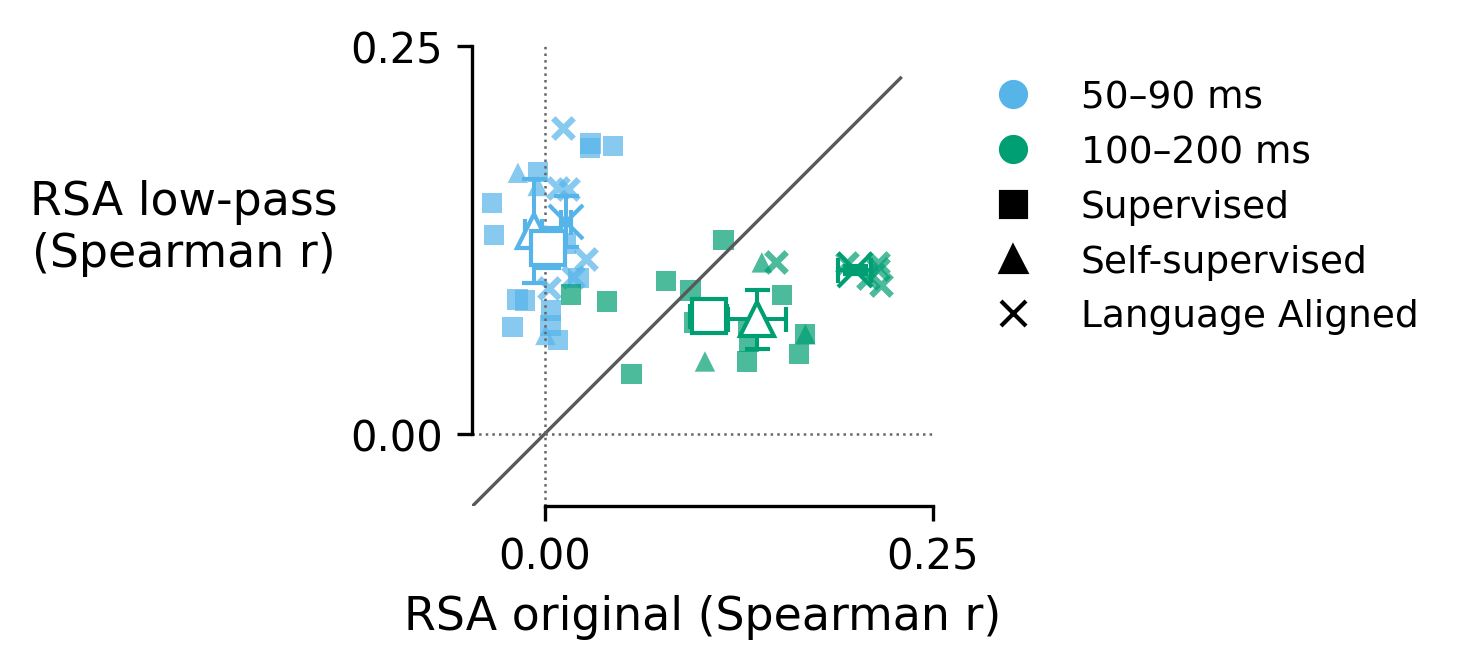

,Window,Condition,Mean,SEM,Direction,p,q,Sig
0,50–90 ms,Original,0.004,0.004,,0.1700,0.1700,
1,50–90 ms,Low-pass,0.126,0.009,,0.0001,0.0001,***
2,50–90 ms,Orig – LP,-0.121,NaN,LP > Orig,0.0001,0.0001,***
3,100–200 ms,Original,0.134,0.012,,0.0001,0.0001,***
4,100–200 ms,Low-pass,0.083,0.005,,0.0001,0.0001,***
5,100–200 ms,Orig – LP,0.051,NaN,Orig > LP,0.0005,0.0006,***


,Window,GroupA,GroupB,Direction,p,q,Sig
0,50–90 ms,Language Aligned,Supervised,Language Aligned > Supervised,0.3111,0.4479,
1,50–90 ms,Language Aligned,Self-supervised,Language Aligned > Self-supervised,0.3733,0.4479,
2,50–90 ms,Supervised,Self-supervised,Self-supervised > Supervised,0.9708,0.9708,
3,100–200 ms,Language Aligned,Supervised,Language Aligned > Supervised,0.0001,0.0006,***
4,100–200 ms,Language Aligned,Self-supervised,Language Aligned > Self-supervised,0.0120,0.0360,*
5,100–200 ms,Supervised,Self-supervised,Self-supervised > Supervised,0.3488,0.4479,


▶ Checking stimulus images …
Extracting downloads/high_variation_stimuli.zip...
Unzipping downloads/high_variation_stimuli.zip...
Unzip successful.
▶ Creating low-pass stimulus set (magnocellular filter) …


100%|██████████| 2560/2560 [00:34<00:00, 73.75it/s]
/tmp/ipython-input-2472323989.py:460: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  return [Path(p).stem for p in pickle.load(fh)["image_names"]]
/tmp/ipython-input-2472323989.py:480: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usag

▶ Checking DNN feature pickles …
▶ Batch: 4b39bbd1f4765c553c81c15896291a985c8c43b3, 9dd2db2f042f5ed96fecb3042a6a3d46cccd9583, fabbae7b2cdca67145e883eb971b0fc40c9d7450, 107300f07e5dab7561544f61e280387a41259f31, d5a1d245988e01770d7168c6aaf8cc340fb65c84, 345e60cf05c2e4421369025cb7cd19ebb024fcc4, c6cc4e49aa5c2cb62133882d93e769cf24a9c7ff, 395f6d74a177c66189c3740ade24dd49b74566b5, 3506d62506cbf58293cf9dfa8bb9c99869138212, 7e28c891da3294fb02aae1d5450e5fd2cb42786e, bea8f8a25f4df9abc87a699e5de7699c722b244a, a7db158c6a3ea16ca656ad0b237b4a7f833b4a3a, 9fe081bc760039626e0cfb6c27077399b35124d4, 6cf9fcb6b6dd7222936c0af6c217e64598b2e73b, d84830eabad3ce9caf3c41aa1b08250525e202ed, 0e9c6addb42a24a316c36cf6c76536ca6fe55471
▶ Running metric-MDS …
▶ Rendering & saving figures …


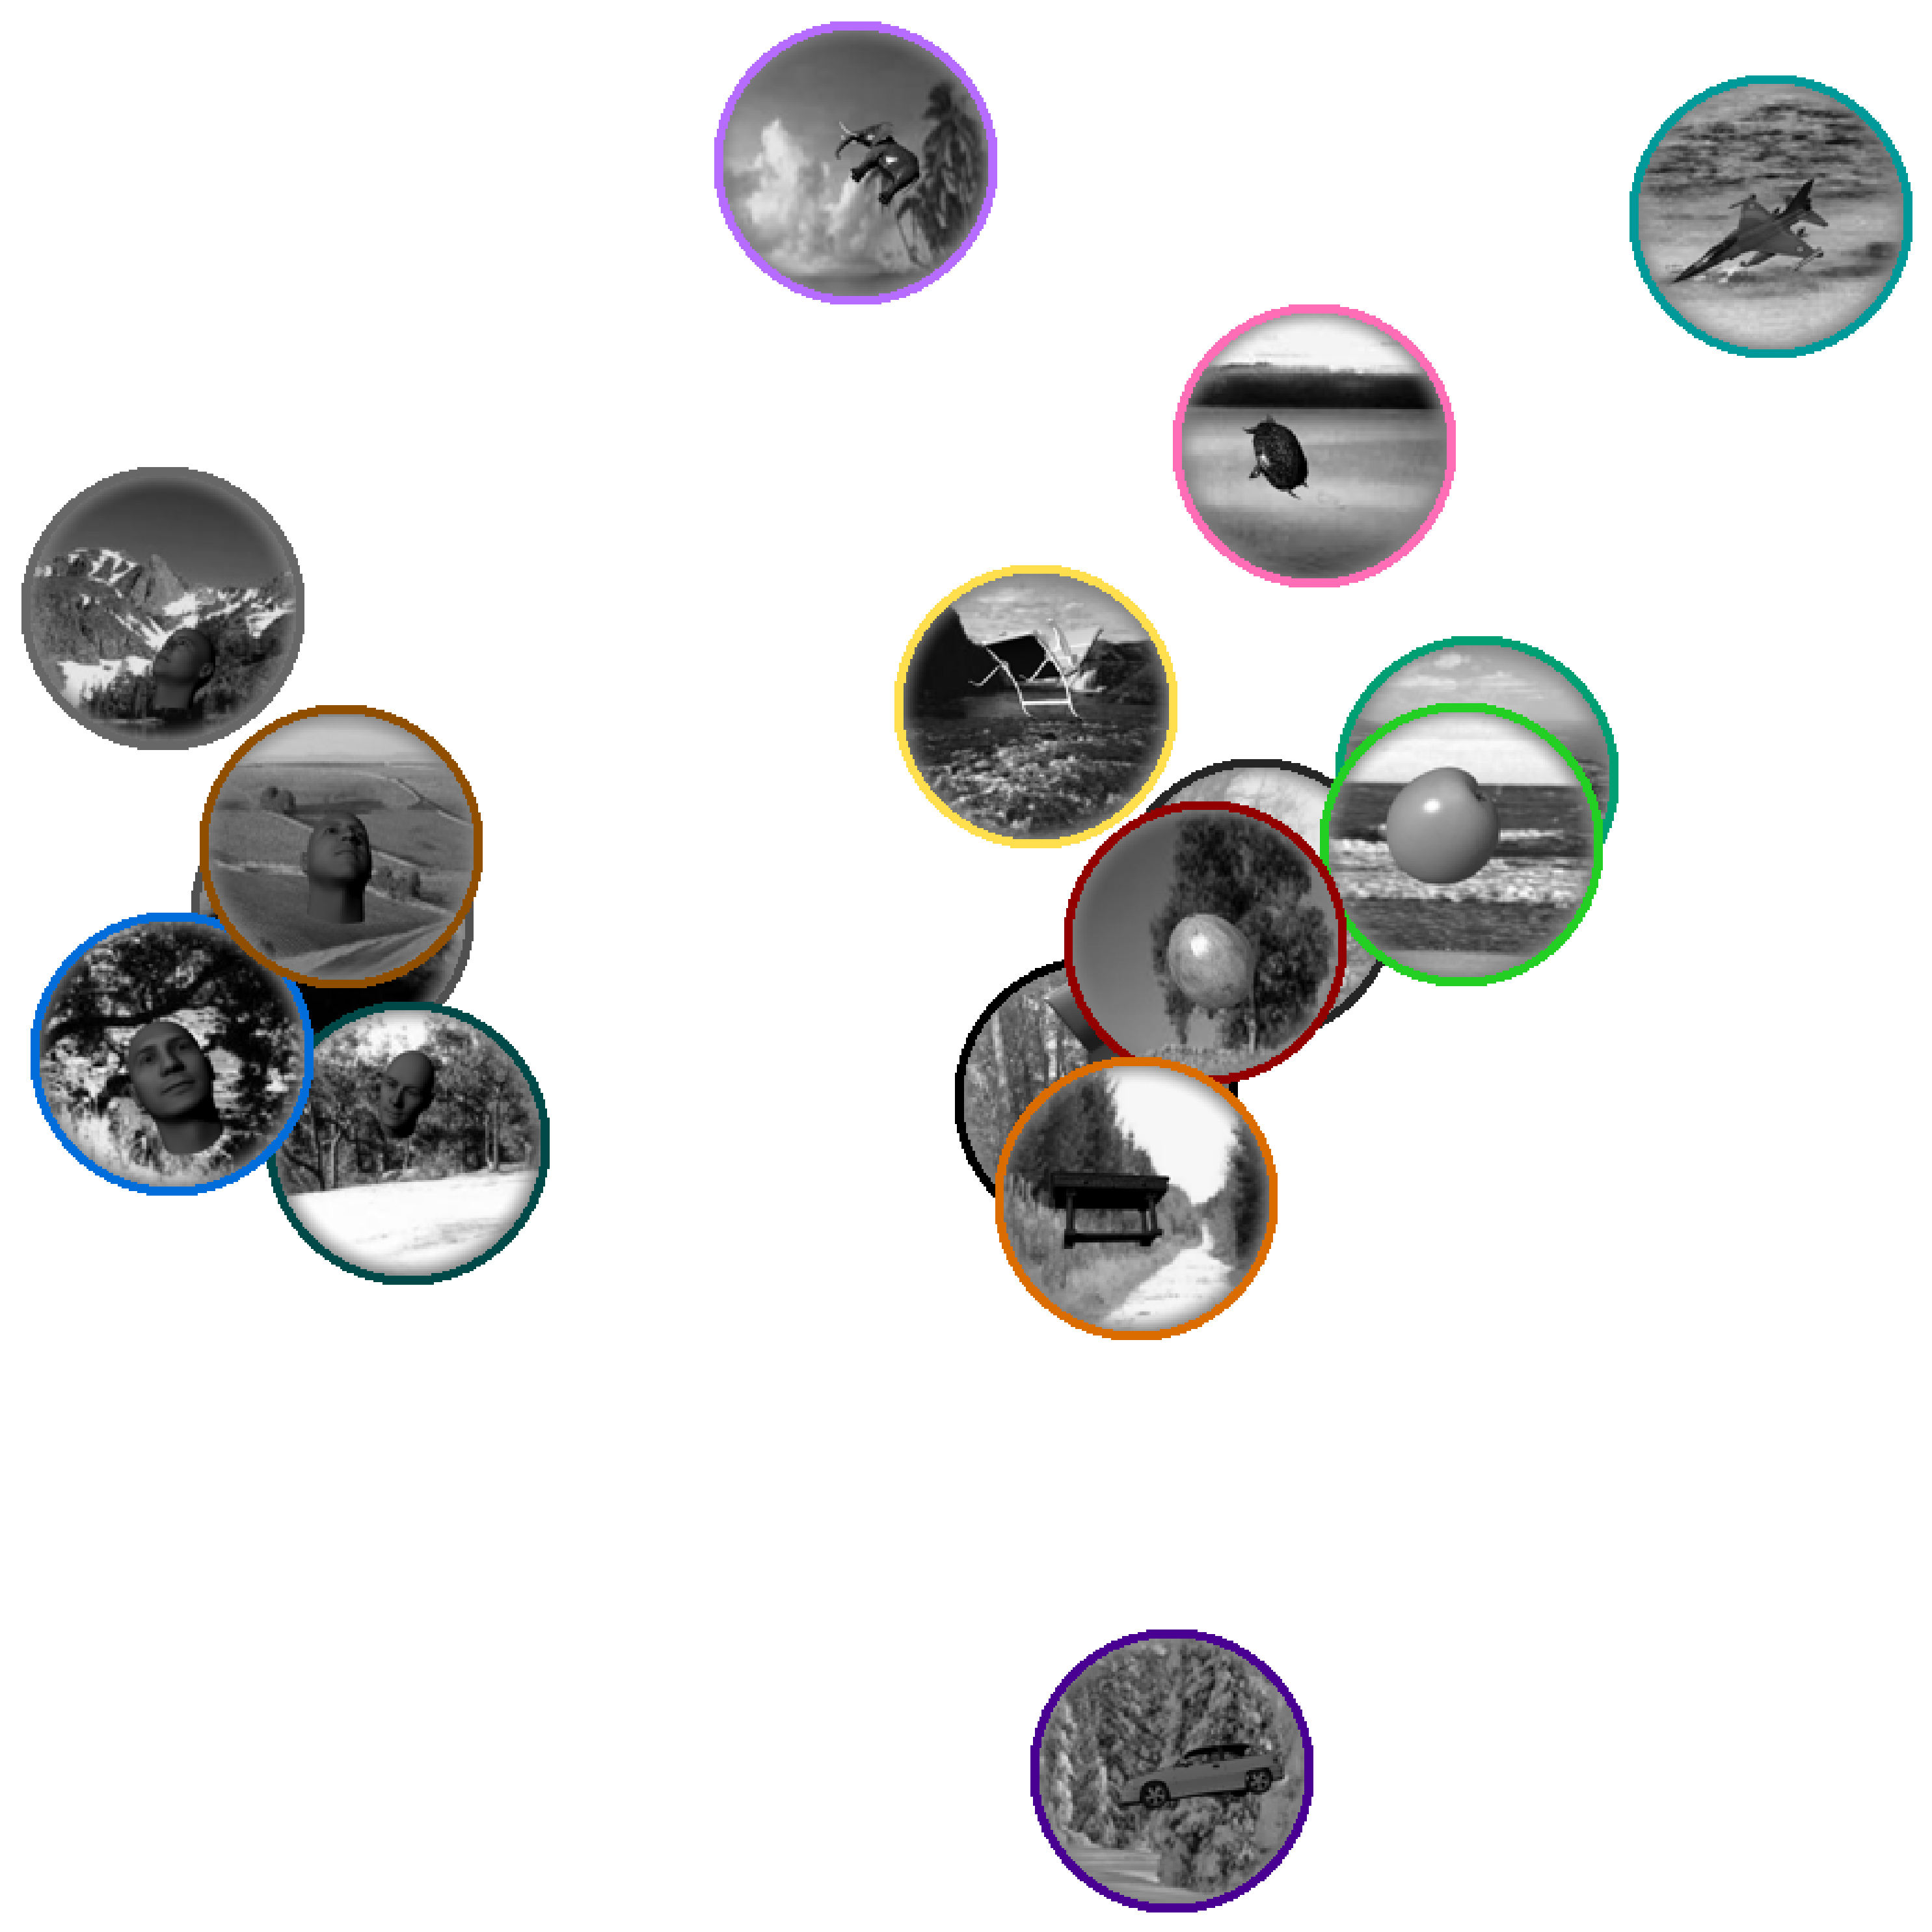

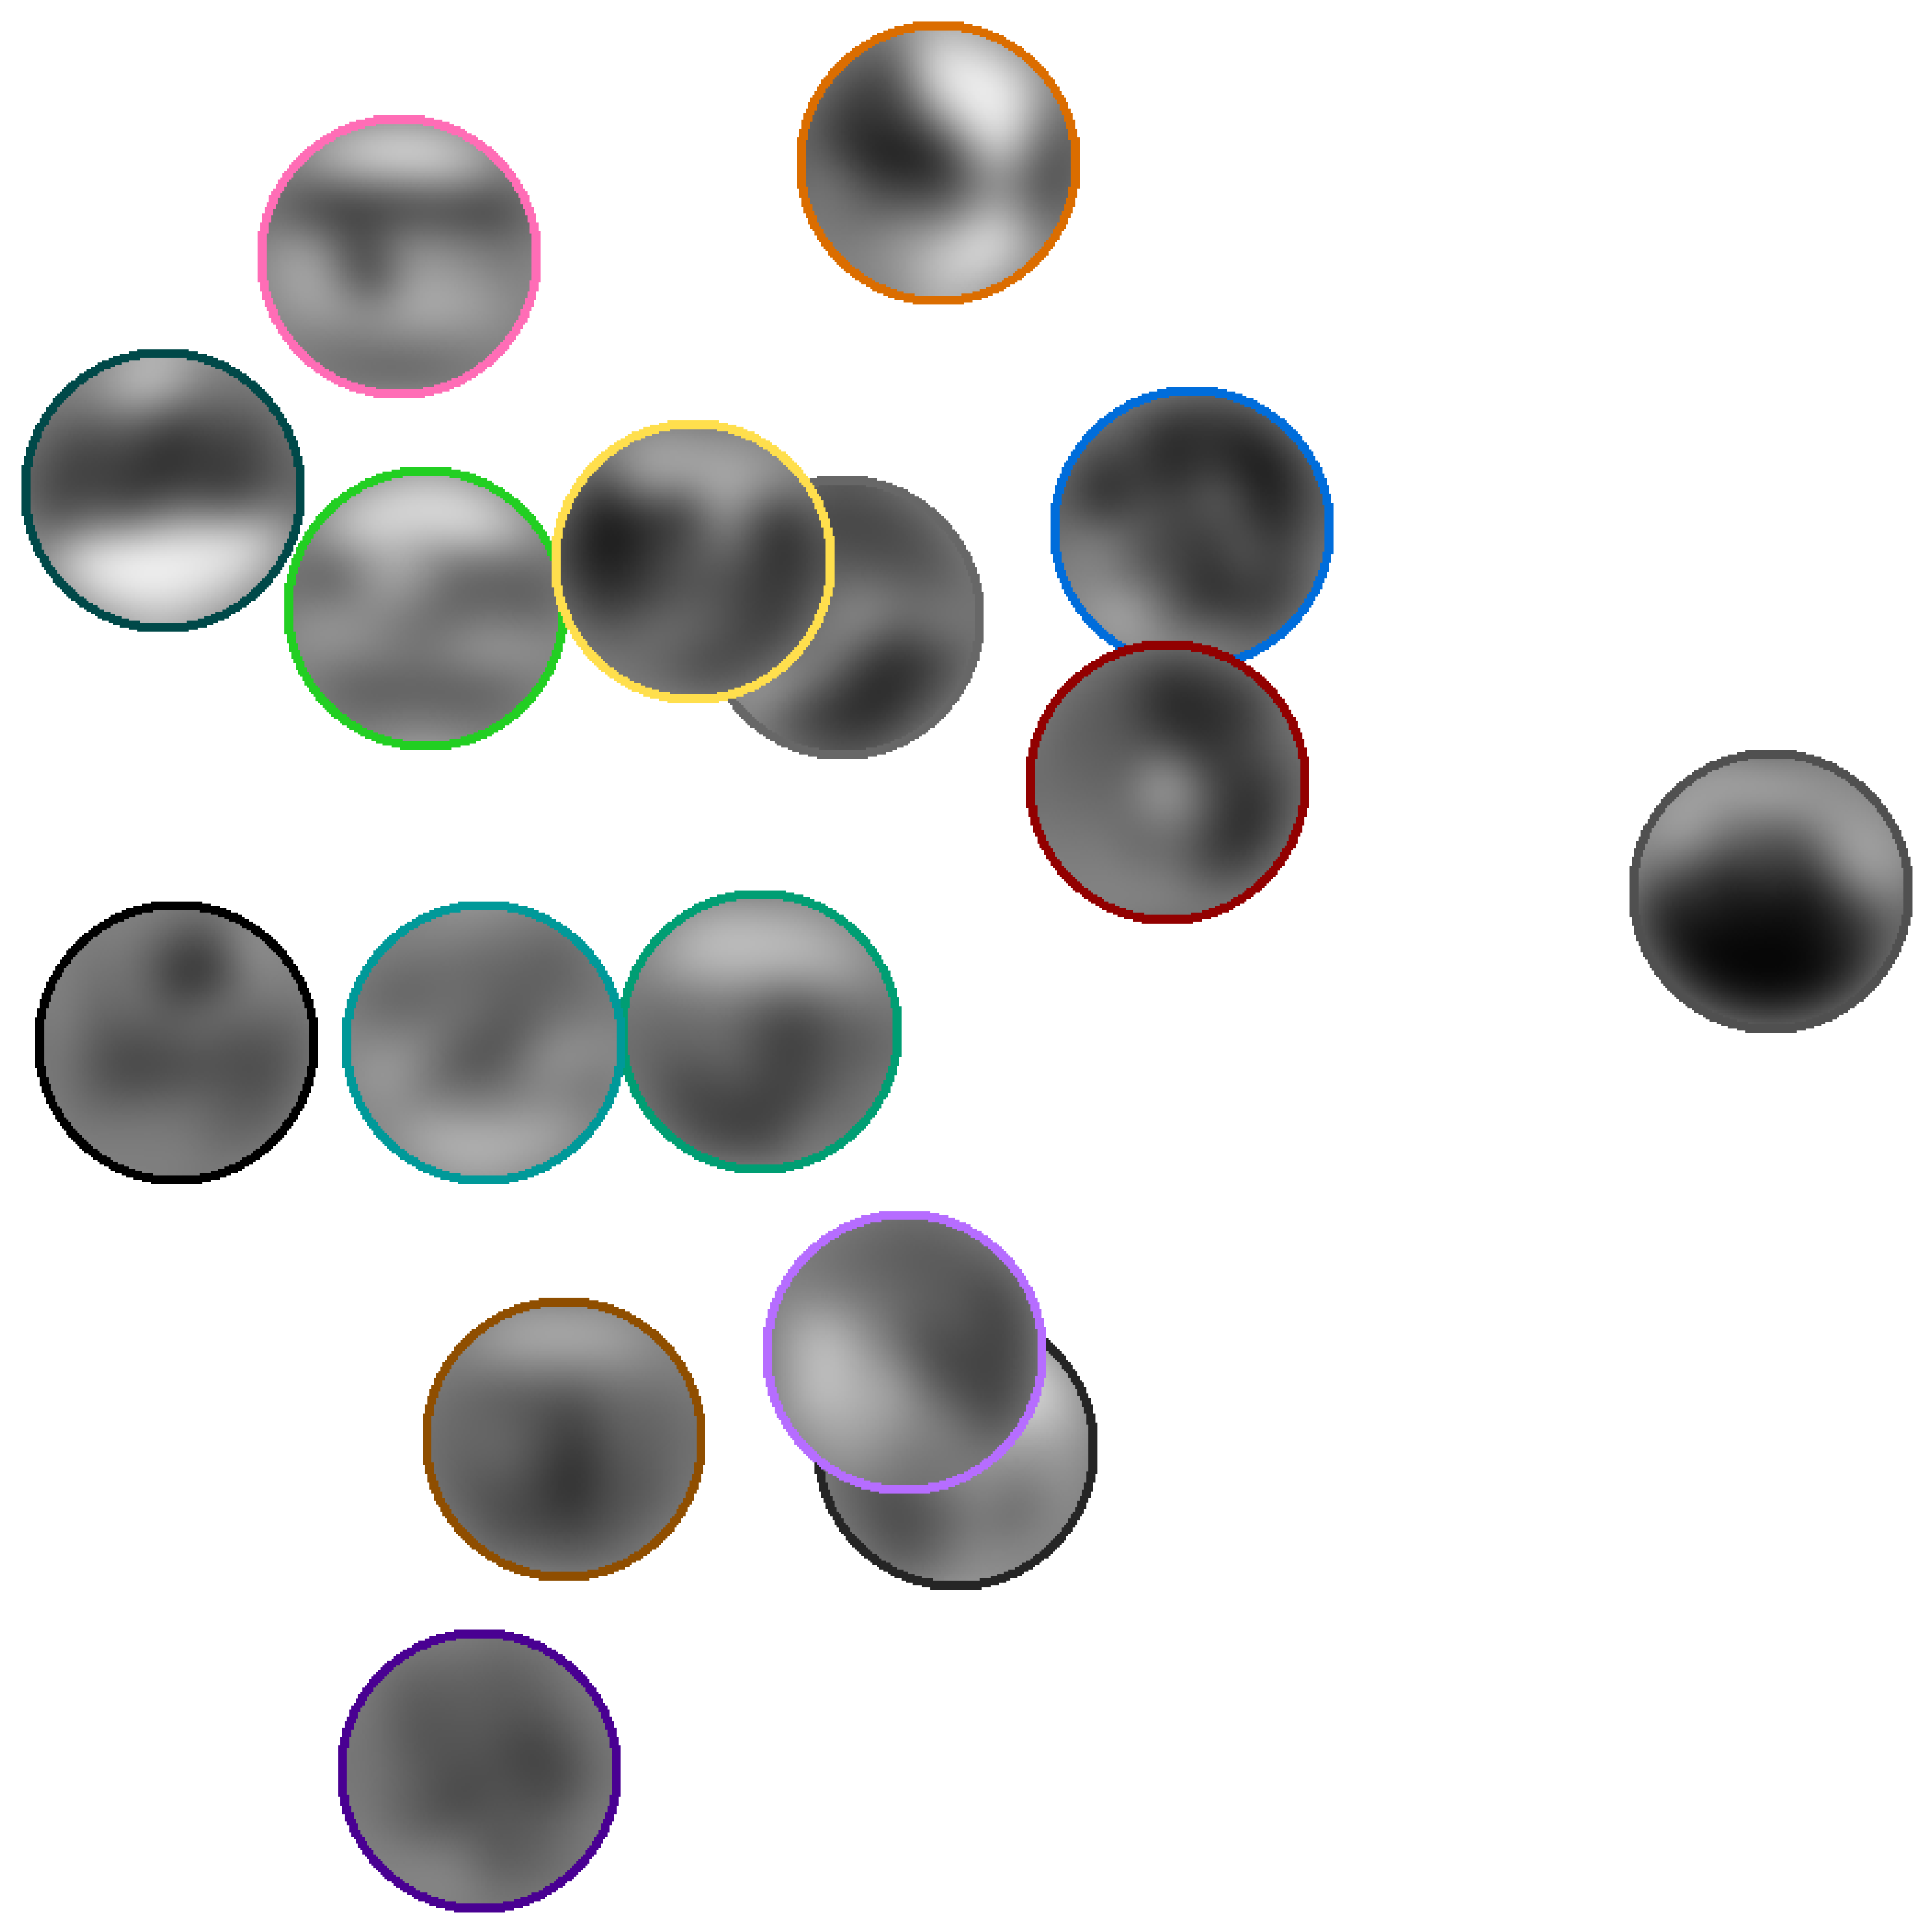

Done – figures saved in the ‘Figures’ directory.


In [ ]:
"""
RSA with DNNs processing original or blurry images
This script generates the figure comparing vlPFC representational geometry
in the early and late time periods with DNN representations of the original
images or images blurred to simulate magnocellular-biased information.

"""

import warnings
from pathlib import Path
from collections import defaultdict
import numpy as np
import pandas as pd
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import rankdata
from statsmodels.stats.multitest import multipletests
from sklearn.manifold import MDS
from scipy.spatial.distance import pdist, squareform
from matplotlib import colors as mcolors
from PIL import Image
import cv2
import time
import re
import pickle
from joblib import Parallel, delayed
from tqdm import tqdm
import os
import sys

# ──────────────────────────────────────────────────────────────────────
# 0. Environment detection
# ──────────────────────────────────────────────────────────────────────
IN_COLAB = False
IN_KAGGLE = False
try:
    if 'google.colab' in str(get_ipython()):
        IN_COLAB = True
except NameError:
    pass
if not IN_COLAB:
    if os.environ.get('KAGGLE_KERNEL_RUN_TYPE', 'Localhost') == 'Interactive':
        IN_KAGGLE = True

# Determine the path to the repository based on the environment
if IN_COLAB:
    path_to_repo = '/content/Dynamics-of-Visual-Representations-in-a-Macaque-Ventrolateral-Prefrontal-Cortex'
elif IN_KAGGLE:
    path_to_repo = '/kaggle/working/Dynamics-of-Visual-Representations-in-a-Macaque-Ventrolateral-Prefrontal-Cortex'
else:
    # Assume local environment where the .py file is in the root of the repo
    path_to_repo = '.'

# Only clone if not already present
if not os.path.exists(path_to_repo):
    os.system("git clone https://github.com/jobellet/Dynamics-of-Visual-Representations-in-a-Macaque-Ventrolateral-Prefrontal-Cortex.git " + path_to_repo)

sys.path.append(path_to_repo)
sys.path.append(os.path.join(path_to_repo, 'utils'))  # Add the utils directory to sys.path

# MODIFICATION: Only importing unzip
from utils.extract_and_download_data import unzip
from utils.analysis_utils import (
    get_upper_indices,
    pairwise_euclidean_distance,
    spearman_corr_ranked,
    training_kind,
    perm_signflip_onesample,      # ← used for one-sample (incl. paired diff via sign-flip)
    perm_diff_independent,        # ← used for group comparisons only
    condensed
)
from utils.plotting_utils import q_to_stars

jax.config.update("jax_enable_x64", True)
warnings.filterwarnings("ignore", category=FutureWarning)

rng_global = np.random.default_rng(42)

BATCH_SIZE   = 16
TIME_WINDOWS = {                       # indices on the >0 ms axis
    "50–90 ms":   slice(5,  9),        # 50–90 ms
    "100–200 ms": slice(10, 20)        # 105–195 ms
}
PALETTE = {                            # Okabe–Ito, red-green safe
    "50–90 ms":   "#56B4E9",
    "100–200 ms": "#009E73"
}
MARKERS = {"Supervised": "s", "Self-supervised": "^", "Language Aligned": "x"}
N_PERM  = 10_000

FIGURES_DIR     = Path("Figures")
STATISTICS_DIR  = Path("Statistics")
FIGURES_DIR.mkdir(exist_ok=True)
STATISTICS_DIR.mkdir(exist_ok=True)

plt.rcParams.update({
    "figure.dpi":         300,
    "axes.spines.top":    False,
    "axes.spines.right":  False,
    "axes.labelsize":     11,
    "xtick.labelsize":    10,
    "ytick.labelsize":    10,
})

# ──────────────────────────────────────────────────────────────────────
# 1. Data Loading (Assumes files are present in 'downloads/')
# ──────────────────────────────────────────────────────────────────────
DOWNLOADS_DIR = Path("downloads")

# Verify essential files exist (populated by the Widget above)
required_files = [
    "deepNetFeatures.zip",
    "Spike_count_even_sessions.npy",
    "Spike_count_odd_sessions.npy",
    "hvm_public_extended_meta.csv"
]

missing = [f for f in required_files if not (DOWNLOADS_DIR / f).exists()]
if missing:
    raise FileNotFoundError(
        f"Missing required files in 'downloads/': {missing}. "
        "Please run the Data Import Widget at the top of the notebook to upload or mount them."
    )

# Unzip features if needed
if not Path("deepNetFeatures").exists():
    print(f"Extracting {DOWNLOADS_DIR / 'deepNetFeatures.zip'}...")
    unzip(DOWNLOADS_DIR / "deepNetFeatures.zip", "deepNetFeatures")
else:
    print("Files already extracted (deepNetFeatures detected).")

meta = pd.read_csv(DOWNLOADS_DIR / "hvm_public_extended_meta.csv")
spike_counts_even = np.load(DOWNLOADS_DIR / "Spike_count_even_sessions.npy")
spike_counts_odd  = np.load(DOWNLOADS_DIR / "Spike_count_odd_sessions.npy")

# Average odd/even for this DNN RSA script (split-half RSA is handled elsewhere)
spike_counts  = 0.5 * (spike_counts_even + spike_counts_odd)
n_stim        = spike_counts.shape[0]
stim_base     = meta['image_id'].str.strip().tolist()

def slice_flat(arr, slc):
    """Flatten (channels × time-bins-in-window) per stimulus."""
    return arr[:, :, slc].reshape(n_stim, -1)

neural = {lbl: slice_flat(spike_counts, sli) for lbl, sli in TIME_WINDOWS.items()}

# ──────────────────────────────────────────────────────────────────────
# 2. Load DNN features
# ──────────────────────────────────────────────────────────────────────
feat_dir = Path("deepNetFeatures")
patt     = re.compile(r"^(?P<net>.*)_features_high_variation_(?P<flav>original|lowpass)\.pkl$")
feat = defaultdict(dict)
for pkl in feat_dir.glob("*.pkl"):
    m = patt.match(pkl.name)
    if m:
        with open(pkl, "rb") as fh:
            feat[m["net"]][m["flav"]] = pickle.load(fh)

# keep only nets that have both original and lowpass variants
feat  = {k: v for k, v in feat.items() if set(v) == {"original", "lowpass"}}
nets  = sorted(feat)
train_type = {n: training_kind(n) for n in nets}

# ──────────────────────────────────────────────────────────────────────
# 3. Helper: make a SINGLE random, non-overlapping partition into 16s
# ──────────────────────────────────────────────────────────────────────
def make_batches_single_partition(n_items, batch_size, rng):
    """
    Returns a list of arrays of length `batch_size` that form a single,
    non-overlapping partition of as many items as fit. Leftovers are dropped.
    """
    perm   = rng.permutation(n_items)
    n_full = (n_items // batch_size) * batch_size
    perm   = perm[:n_full]
    return [perm[i:i+batch_size] for i in range(0, n_full, batch_size)]

# ──────────────────────────────────────────────────────────────────────
# 4. RSA computation (single-partition 16-stim batches, paired tests)
# ──────────────────────────────────────────────────────────────────────
rsa = {lbl: {} for lbl in TIME_WINDOWS}

for net in nets:
    f_o = feat[net]["original"]["penultimate"]
    f_l = feat[net]["lowpass"]["penultimate"]
    if f_o.ndim > 2: f_o = f_o.reshape(f_o.shape[0], -1)
    if f_l.ndim > 2: f_l = f_l.reshape(f_l.shape[0], -1)

    names_o = [Path(x).stem for x in feat[net]["original"]["image_names"]]
    names_l = [Path(x).stem for x in feat[net]["lowpass"]["image_names"]]
    common  = sorted(set(names_o) & set(names_l) & set(stim_base))

    # need at least one batch
    if len(common) < BATCH_SIZE:
        warnings.warn(f"{net}: skipped (only {len(common)} common stimuli).")
        continue

    # map 'common' into indices for each source
    idx_o = np.array([names_o.index(s)   for s in common])
    idx_l = np.array([names_l.index(s)   for s in common])
    idx_n = np.array([stim_base.index(s) for s in common])

    # SINGLE random non-overlapping partition (seeded for reproducibility)
    batches = make_batches_single_partition(len(common), BATCH_SIZE, rng_global)

    accum = {lbl: {"o": [], "l": []} for lbl in TIME_WINDOWS}

    for b in batches:
        # condensed distances within the 16-sized batch; rank before correlation
        r_o = rankdata(condensed(f_o[idx_o[b]]))
        r_l = rankdata(condensed(f_l[idx_l[b]]))

        for lbl, neu_mat in neural.items():
            r_n = rankdata(condensed(neu_mat[idx_n[b]]))
            accum[lbl]["o"].append(spearman_corr_ranked(r_n, r_o))
            accum[lbl]["l"].append(spearman_corr_ranked(r_n, r_l))

    # average across batches → one value per (net × window × condition)
    for lbl in TIME_WINDOWS:
        mu_o = float(np.mean(accum[lbl]["o"]))
        se_o = float(np.std(accum[lbl]["o"], ddof=1) / np.sqrt(len(accum[lbl]["o"])))
        mu_l = float(np.mean(accum[lbl]["l"]))
        se_l = float(np.std(accum[lbl]["l"], ddof=1) / np.sqrt(len(accum[lbl]["l"])))
        rsa[lbl][net] = (mu_o, se_o, mu_l, se_l)

# ──────────────────────────────────────────────────────────────────────
# 5. Gather vectors per window & paired stats (Orig vs Low-pass)
# ──────────────────────────────────────────────────────────────────────
vals, one_p, pair_p = {}, {}, {}
for lbl in TIME_WINDOWS:
    mu_o = np.array([rsa[lbl][n][0] for n in nets if n in rsa[lbl]])
    se_o = np.array([rsa[lbl][n][1] for n in nets if n in rsa[lbl]])
    mu_l = np.array([rsa[lbl][n][2] for n in nets if n in rsa[lbl]])
    se_l = np.array([rsa[lbl][n][3] for n in nets if n in rsa[lbl]])
    kept = [n for n in nets if n in rsa[lbl]]
    vals[lbl] = (mu_o, se_o, mu_l, se_l, kept)

    # one-sample tests vs 0 (per condition) across networks
    _, _, p_o   = perm_signflip_onesample(mu_o, N_PERM, greater=True)
    _, _, p_l   = perm_signflip_onesample(mu_l, N_PERM, greater=True)
    one_p[lbl]  = (p_o, p_l)

    # ★ paired test: within-network difference (Orig − Low-pass), two-sided
    diff        = mu_o - mu_l
    _, _, p_pr  = perm_signflip_onesample(diff, N_PERM, greater=False)
    pair_p[lbl] = p_pr

# FDR across all p’s (two windows × [Orig, LP, paired])
raw_p = [*sum(one_p.values(), ()), *pair_p.values()]
_, q_all, *_ = multipletests(raw_p, method="fdr_bh")
q_iter = iter(q_all)
q_one, q_pair = {}, {}
for lbl in TIME_WINDOWS:        # Orig, LP
    q_one[lbl] = (next(q_iter), next(q_iter))
for lbl in TIME_WINDOWS:        # paired
    q_pair[lbl] = next(q_iter)

# ──────────────────────────────────────────────────────────────────────
# 6. Scatter plot (RSA original vs low-pass), per window
# ──────────────────────────────────────────────────────────────────────
def group_stats(values, types):
    df = pd.DataFrame({'val': values, 'kind': types})
    return df.groupby('kind')['val'].mean(), df.groupby('kind')['val'].sem(ddof=1)

fig, ax = plt.subplots(figsize=(5, 5))
ax.set_aspect('equal')

for lbl, (xo, _, xl, _, kept) in vals.items():
    col   = PALETTE[lbl]
    kinds = [training_kind(n) for n in kept]

    # 1) individual nets
    for xi, yi, k in zip(xo, xl, kinds):
        ax.scatter(xi, yi, s=24, marker=MARKERS[k], c=col, alpha=.7, edgecolors='none')

    # 2) group means ± SEM
    μx, σx = group_stats(xo, kinds)
    μy, σy = group_stats(xl, kinds)
    for k in μx.index:
        ax.errorbar(μx[k], μy[k], xerr=σx[k], yerr=σy[k],
                    fmt=MARKERS[k], mfc='white', mec=col,
                    ecolor=col, elinewidth=.95, capsize=3, zorder=4, ms=8)

lims = np.array([ax.get_xlim(), ax.get_ylim()]).flatten()
lims = lims.min(), lims.max()
ax.plot(lims, lims, lw=.8, c='0.35')
ax.set_xlim(lims); ax.set_ylim(lims)
ax.axhline(0, lw=.6, c='0.4', ls=':')
ax.axvline(0, lw=.6, c='0.4', ls=':')
ax.set_xlabel("RSA original (Spearman r)")
ax.set_ylabel("RSA low-pass\n(Spearman r)", rotation=0, labelpad=40)

handles = ([plt.Line2D([0], [0], marker='o', ls='', c=PALETTE[lbl]) for lbl in TIME_WINDOWS] +
           [plt.Line2D([0], [0], marker=MARKERS[k], ls='', c='k') for k in MARKERS])
labels  = list(TIME_WINDOWS.keys()) + list(MARKERS.keys())
ax.legend(handles, labels, fontsize=9, frameon=False,
          title="", title_fontsize=9,
          loc='upper left', bbox_to_anchor=(1.02, 1))

ax.set_xticks([0, .25]); ax.set_yticks([0, .25])
sns.despine(ax=ax, trim=True)
fig.tight_layout()
fig.savefig(FIGURES_DIR / "RSA_with_DNNs.pdf",  bbox_inches="tight")
fig.savefig(FIGURES_DIR / "RSA_with_DNNs.jpeg", dpi=300, bbox_inches="tight")
fig.savefig(FIGURES_DIR / "RSA_with_DNNs.svg",  bbox_inches="tight")
if IN_COLAB or IN_KAGGLE:
    plt.show()
else:
    plt.close(fig)

# ──────────────────────────────────────────────────────────────────────
# 7. Statistics tables
# ──────────────────────────────────────────────────────────────────────
from IPython.display import display

def direction_tt(mu_a, mu_b, grp_a, grp_b):
    if np.isclose(mu_a, mu_b): return "≈"
    return f"{grp_a} > {grp_b}" if mu_a > mu_b else f"{grp_b} > {grp_a}"

# 7a) one-sample & paired (Orig vs LP) tests
rows = []
for lbl in TIME_WINDOWS:
    mu_o, _, mu_l, _, _ = vals[lbl]
    diff                = mu_o.mean() - mu_l.mean()

    p_o, p_l            = one_p[lbl]
    q_o, q_l            = q_one[lbl]
    p_pair_w, q_pair_w  = pair_p[lbl], q_pair[lbl]

    rows += [
        dict(Window=lbl, Condition="Original",  Mean=mu_o.mean(),
             SEM=mu_o.std(ddof=1)/np.sqrt(len(mu_o)),
             Direction="", p=p_o, q=q_o, Sig=q_to_stars(q_o)),
        dict(Window=lbl, Condition="Low-pass",  Mean=mu_l.mean(),
             SEM=mu_l.std(ddof=1)/np.sqrt(len(mu_l)),
             Direction="", p=p_l, q=q_l, Sig=q_to_stars(q_l)),
        dict(Window=lbl, Condition="Orig – LP", Mean=diff, SEM=np.nan,
             Direction=("Orig > LP" if diff > 0 else "LP > Orig"),
             p=p_pair_w, q=q_pair_w, Sig=q_to_stars(q_pair_w))
    ]

stats_df = (pd.DataFrame(rows)
              .loc[:, ["Window","Condition","Mean","SEM",
                       "Direction","p","q","Sig"]]
              .round({"Mean":3, "SEM":3, "p":4, "q":4}))
stats_df.to_csv(STATISTICS_DIR / "RSA_summary_stats.csv", index=False)

# 7b) training-type comparisons on (RSA_orig + RSA_lp)/2 (independent tests)
pair_rows = []
for lbl in TIME_WINDOWS:
    kept   = vals[lbl][4]
    kinds  = pd.Series({n: training_kind(n) for n in kept})
    mu_o   = pd.Series(vals[lbl][0], index=kept)
    mu_l   = pd.Series(vals[lbl][2], index=kept)
    mu_avg = 0.5 * (mu_o + mu_l)                 # overall RSA per net

    uniq = list(kinds.unique())
    for i in range(len(uniq)):
        for j in range(i+1, len(uniq)):
            a, b = uniq[i], uniq[j]
            xa, xb = mu_avg[kinds == a], mu_avg[kinds == b]
            _, _, p = perm_diff_independent(np.asarray(xa), np.asarray(xb), N_PERM)
            pair_rows.append(dict(Window=lbl,
                                  GroupA=a, GroupB=b,
                                  Direction=direction_tt(xa.mean(), xb.mean(), a, b),
                                  p=p))

pairwise_df = pd.DataFrame(pair_rows)
_, q_vals, *_   = multipletests(pairwise_df["p"], method="fdr_bh")
pairwise_df["q"]   = q_vals
pairwise_df["Sig"] = [q_to_stars(q) for q in q_vals]
pairwise_df = (pairwise_df
                 .round({"p":4, "q":4})
                 .loc[:, ["Window","GroupA","GroupB","Direction","p","q","Sig"]])
pairwise_df.to_csv(STATISTICS_DIR / "RSA_pairwise_trainingtype.csv", index=False)

# show in interactive sessions
try:
    display(stats_df)
    display(pairwise_df)
except Exception:
    pass

# ──────────────────────────────────────────────────────────────────────
# 8. OPTIONAL: MDS visualisation for a single 16-image batch (CLIP)
# ──────────────────────────────────────────────────────────────────────
#!/usr/bin/env python
"""
Script 2 — CLIP-average RDM → MDS visualisation
For a single 16-image batch we:
1) Load penultimate-layer features from all CLIP (Language-aligned) nets.
2) Compute RDM per net for original and low-pass, rank-transform distances.
3) Average RDMs across nets, run metric-MDS (2-D), and render image canvases.
"""

from utils.image_processing import m_pathway_filter_gaussian

plt.rcParams.update({
    "figure.dpi":         300,
    "axes.spines.top":    False,
    "axes.spines.right":  False,
})

FIG_DIR  = FIGURES_DIR
STIM_DIR = Path("high_variation_stimuli")
LP_DIR   = Path("high_variation_stimuli_lowpass")
FEAT_DIR = Path("deepNetFeatures")

print("▶ Checking stimulus images …")
# MODIFICATION: Removed download_files call.
# Checking if folder or zip exists.
stim_zip = DOWNLOADS_DIR / "high_variation_stimuli.zip"
if not Path("high_variation_stimuli").exists():
    if stim_zip.exists():
        print(f"Extracting {stim_zip}...")
        unzip(stim_zip, "")
    else:
        # Warning if files are missing, but don't crash the script if optional
        print(f"⚠️ Warning: {stim_zip} not found. MDS visualization part might fail.")

# build low-pass set only if directory is still empty
LP_DIR.mkdir(exist_ok=True)
if not any(LP_DIR.iterdir()):
    print("▶ Creating low-pass stimulus set (magnocellular filter) …")
    img_files = sorted(STIM_DIR.glob("*.png"))
    for img_path in tqdm(img_files):
        img = cv2.imread(str(img_path), cv2.IMREAD_GRAYSCALE)
        if img is None:
            continue
        lp  = m_pathway_filter_gaussian(img)
        if lp.dtype != np.uint8:
            lp = np.clip(lp, 0, 255).astype(np.uint8)
        lp_rgb = cv2.cvtColor(lp, cv2.COLOR_GRAY2RGB)
        cv2.imwrite(str(LP_DIR / img_path.name), lp_rgb)

print("▶ Checking DNN feature pickles …")
# (Features already unzipped in Step 1, but verifying here just in case)
if not FEAT_DIR.exists():
     print("Re-extracting deepNetFeatures...")
     unzip(DOWNLOADS_DIR / "deepNetFeatures.zip", "deepNetFeatures")

feat_paths = {}
patt2 = re.compile(r"^(?P<net>.*)_features_high_variation_(?P<flav>original|lowpass)\.pkl$", re.I)
for pkl in FEAT_DIR.glob("*.pkl"):
    m = patt2.match(pkl.name)
    if m:
        net, flav = m["net"], m["flav"]
        feat_paths.setdefault(net, {})[flav] = pkl

clip_nets = sorted([
    n for n, d in feat_paths.items()
    if set(d) == {"original", "lowpass"} and training_kind(n) == "Language Aligned"
])
if not clip_nets:
    raise RuntimeError("No CLIP (Language-aligned) networks with both flavours found in deepNetFeatures.")

def _load_names(pkl_path):
    with open(pkl_path, "rb") as fh:
        return [Path(p).stem for p in pickle.load(fh)["image_names"]]

names_all = [set(_load_names(feat_paths[n]["original"])) &
             set(_load_names(feat_paths[n]["lowpass"])) for n in clip_nets]
common = sorted(set.intersection(*names_all))
if len(common) < BATCH_SIZE:
    raise RuntimeError("Shared stimulus count is smaller than batch size.")

# choose a reproducible batch from `common`
batch_idx   = rng_global.choice(len(common), size=BATCH_SIZE, replace=False)
batch_names = [common[i] for i in batch_idx]
print("▶ Batch:", ", ".join(batch_names))

_flatten = lambda a: a.reshape(a.shape[0], -1) if a.ndim > 2 else a

# Build mean RDMs (original & low-pass)
from scipy.stats import rankdata as _rank
rdm_o_all, rdm_l_all = [], []
for net in clip_nets:
    with open(feat_paths[net]["original"], "rb") as fh:
        f_o = _flatten(pickle.load(fh)["penultimate"])
    with open(feat_paths[net]["lowpass"], "rb") as fh:
        f_l = _flatten(pickle.load(fh)["penultimate"])
    names_net = _load_names(feat_paths[net]["original"])
    idx       = np.array([names_net.index(b) for b in batch_names])
    rdm_o_all.append(_rank(pdist(f_o[idx], metric="euclidean")))
    rdm_l_all.append(_rank(pdist(f_l[idx], metric="euclidean")))

mean_rdm_o = np.mean(rdm_o_all, axis=0)
mean_rdm_l = np.mean(rdm_l_all, axis=0)

print("▶ Running metric-MDS …")
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=42)
coords_o = mds.fit_transform(squareform(mean_rdm_o))
coords_l = mds.fit_transform(squareform(mean_rdm_l))

def plot_many_images_in_one_canevas(coordinates, impaths):
    """Draw 128×128 thumbnails with a 4-px colour-blind-safe ring (r = 60–64 px)."""
    palette_hex = [
        "#000000", "#252525", "#676767", "#009E73",
        "#505050", "#004949", "#009999", "#22CF22",
        "#490092", "#006DDB", "#B66DFF", "#FF6DB6",
        "#920000", "#8F4E00", "#DB6D00", "#FFDF4D",
    ]
    colors = np.array([mcolors.to_rgb(h) for h in palette_hex], float)

    image_res   = 850
    coords_norm = (image_res - 128) * (coordinates - coordinates.min(0)) \
                  / (coordinates.max(0) - coordinates.min(0))

    fig, ax = plt.subplots(figsize=(10, 10)); ax.axis("off")
    canvas  = np.ones((image_res, image_res, 3), float)

    yy, xx   = np.ogrid[:128, :128]
    dist2    = (xx - 64) ** 2 + (yy - 64) ** 2
    mask_img = dist2 < 60 ** 2
    mask_ring = (60 ** 2 <= dist2) & (dist2 < 64 ** 2)

    for i, path in enumerate(impaths):
        x, y = map(int, coords_norm[i])
        arr  = np.asarray(Image.open(path).resize((128, 128)))
        if arr.ndim == 2:
            arr = np.stack([arr]*3, axis=2)
        arr = arr[..., :3] / 255.0

        patch = canvas[y:y+128, x:x+128]
        patch[mask_ring] = colors[i % len(colors)]
        patch[mask_img]  = arr[mask_img]
        canvas[y:y+128, x:x+128] = patch

    ax.imshow(canvas)
    plt.tight_layout()
    return fig

orig_paths = [STIM_DIR / f"{b}.png" for b in batch_names]
lowp_paths = [LP_DIR   / f"{b}.png" for b in batch_names]

print("▶ Rendering & saving figures …")
fig_o = plot_many_images_in_one_canevas(coords_o, orig_paths)
fig_l = plot_many_images_in_one_canevas(coords_l, lowp_paths)

fig_o.savefig(FIGURES_DIR / "MDS_CLIP_batch_original.pdf", bbox_inches="tight")
fig_o.savefig(FIGURES_DIR / "MDS_CLIP_batch_original.jpeg", dpi=300, bbox_inches="tight")
fig_o.savefig(FIGURES_DIR / "MDS_CLIP_batch_original.svg", bbox_inches="tight")
if IN_COLAB or IN_KAGGLE:
    plt.show()
else:
    plt.close(fig_o)

fig_l.savefig(FIGURES_DIR / "MDS_CLIP_batch_lowpass.pdf", bbox_inches="tight")
fig_l.savefig(FIGURES_DIR / "MDS_CLIP_batch_lowpass.jpeg", dpi=300, bbox_inches="tight")
fig_l.savefig(FIGURES_DIR / "MDS_CLIP_batch_lowpass.svg", bbox_inches="tight")
if IN_COLAB or IN_KAGGLE:
    plt.show()
else:
    plt.close(fig_l)

print("Done – figures saved in the ‘Figures’ directory.")

# Download figures and statistics (only when using google colab)

In [ ]:
import os
from google.colab import files

# Define the directories to zip
directories_to_zip = ["Figures", "Statistics"]
zip_filename = "results_RSA_DNN.zip"

# Check if directories exist before zipping
existing_directories = [d for d in directories_to_zip if os.path.exists(d)]

if existing_directories:
    # Create a zip archive of the specified directories
    zip_command = f"zip -r {zip_filename} {' '.join(existing_directories)}"
    os.system(zip_command)

    # Provide a download link for the zip file
    if os.path.exists(zip_filename):
        print(f"Created {zip_filename}. You can download it using the link below.")
        files.download(zip_filename)
    else:
        print(f"Failed to create {zip_filename}.")
else:
    print("Neither the 'Figures' nor the 'Statistics' directory was found.")

Created results_RSA_DNN.zip. You can download it using the link below.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>